## 1에서 10까지 예측 모델 구하기

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# 데이터 생성
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([1,2,3,4,5,6,7,8,9,10])

# 딥러닝 모델을 순차적으로 구성
model = Sequential()

# 순차적 구성 모델에 Dense 레이어를 추가
model.add(Dense(1, input_dim=1, activation='relu'))

# loss      : 손실 함수는 어떤 것을 사용할 것인가?, 작을수록 좋음
# optimizer : 최적화 함수는?
# metrics   : 어떤 방식?, accuracy는 1에 가까울수록 좋음
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# 모델 실행
# batch_size : 몇개씩 끊어서 작업을 할 것인가, 크게 잡을 경우 속도 ↑/정확도 ↓, 작게 잡을 경우 속도 ↓/정확도 ↑/overfitting 가능성
# verbose=0  : 로그 기록 X
model.fit(x, y, epochs= 500, batch_size=1, verbose=0)
loss, acc = model.evaluate(x, y, batch_size=1)
print("loss : ", loss)
print("acc : ", acc)

10/10 [==============================] - 0s 1ms/step - loss: 4.0088e-06 - accuracy: 0.1000
loss :  4.00878207074129e-06
acc :  0.10000000149011612


## 101에서 110까지 구하기

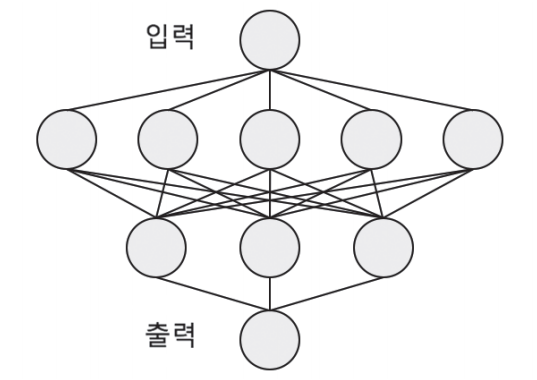

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/Prediction of Time Series Walking in Deep Learning/pic/ch02_01.png', width=300)

In [ ]:
x_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([1,2,3,4,5,6,7,8,9,10])
x_test  = np.array([101,102,103,104,105,106,107,108,109,110])
y_test  = np.array([101,102,103,104,105,106,107,108,109,110])

model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu'))       # x_train으로 1개의 컬럼 데이터 입력, 출력은 5개
model.add(Dense(3))                                       # 5개의 입력이 다시 3개의 노드로 출력
model.add(Dense(1, activation='relu'))                    # 3개의 입력을 받아 1개로 출력
model.summary()                                           # 모델 구성을 확인하는 가장 쉬운 방법

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=1, validation_data = (x_test, y_test), verbose=0)
loss, acc = model.evaluate(x_test, y_test, batch_size=1)
print("loss : ", loss)
print("acc : ", acc)

output = model.predict(x_test)
print("결과물 : \n", output)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
10/10 [==============================] - 0s 1ms/step - loss: 22.3051 - accuracy: 0.0000e+00
loss :  22.305105209350586
acc :  0.0
결과물 : 
 [[ 96.4944  ]
 [ 97.44656 ]
 [ 98.39874 ]
 [ 99.350914]
 [100.303085]
 [101.25526 ]
 [102.20743 ]
 [103.15961 ]
 [104.11177 ]
 [105.06394 ]]


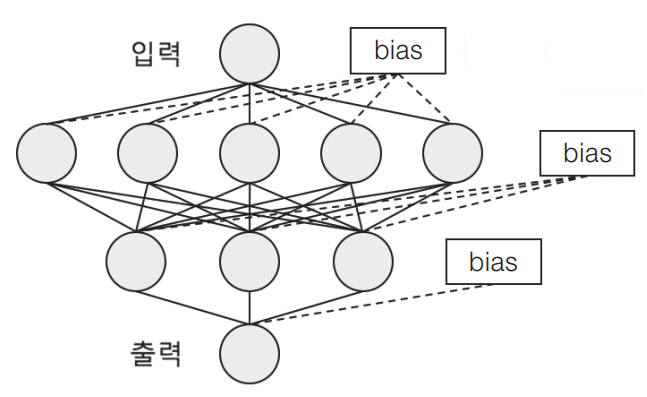

In [ ]:
Image('/content/drive/My Drive/Prediction of Time Series Walking in Deep Learning/pic/ch02_02.png', width=300)

```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
=================================================================
```

- 1st hidden layer params = (input + bias) × output = (1 + 1) × 5 = 10
- 2nd hidden layer params = (input + bias) × output = (5 + 1) × 3 = 18
- output hidden layer params = (input + bias) × output = (3 + 1) × 1 = 4